In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

$S(t)$ : number of susceptible persons  
$I(t)$ : number of infected persons  
$R(t)$ : number of recovered persons   

$\dot{S}(t) = - \dfrac{1.4 \cdot 10^{-8}}{day \cdot person} I(t)S(t)$  

$\dot{I}(t) = \dfrac{1.4 \cdot 10^{-8}}{day \cdot person} I(t)S(t) - \dfrac{1}{5 days} I(t)$ 

$\dot{R}(t) = \dfrac{1}{5 days} I(t)$ 


Population size: 74 million  
Average amount of contacts: 4  
Infection probability : 26%

In [2]:
# Based on student number
population_size = 74e6
contacts        = 4
infection_prob  = 0.26

latency = 2
infectious_time = 5

In [3]:
infection_rate = contacts * infection_prob / population_size
infection_rate

1.4054054054054055e-08

In [4]:
def seir(n, h, lat = latency, inf_time = infectious_time, inf_rate = infection_rate, pop_size = population_size, cont = contacts, i0 = 4e4, vacc_count = 0):
    s = np.zeros(n + 1)
    e = np.zeros(n + 1)
    i = np.zeros(n + 1)
    r = np.zeros(n + 1)

    s[0] = pop_size - i0 - vacc_count
    i[0] = i0
    r[0] = vacc_count

    # print(s[0])

    for step in range(n):
        s2e         = h * infection_rate * s[step] * i[step]
        e2i         = h / lat * e[step]
        i2r         = h / inf_time * i[step]

        s[step + 1] = s[step] - s2e
        e[step + 1] = e[step] + s2e - e2i
        i[step + 1] = i[step] + e2i - i2r
        r[step + 1] = r[step] + i2r

    return s, e, i, r

In [5]:
def plot_seir(seir_tup, range_=0, log=False):
    x = np.linspace(0, len(seir_tup[0]) / 2, num=len(seir_tup[0]))
    plt.plot(x, seir_tup[0], label="S")
    plt.plot(x, seir_tup[1], label="E")
    plt.plot(x, seir_tup[2], label="I")
    plt.plot(x, seir_tup[3], label="R")
    plt.xlabel("Time in days")
    plt.ylabel("Population size")
    if log:
        plt.title("y-log scale")
        plt.yscale("log")
    plt.legend()
    plt.show()

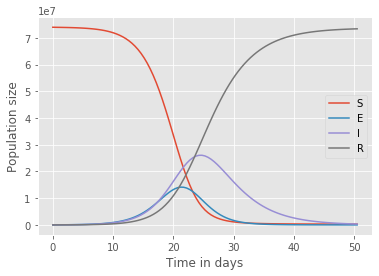

In [6]:
seir_tup = seir(100, 0.5, i0=4e4)
plot_seir(seir_tup)
epidemic_percentage = 60 / 100_000

Minimum amount of vaccinations to avoid an epidemic: 58,650,000  
A disease outbreak is defined as an epidemic when 60 out of 100,000 people are infected at one time.

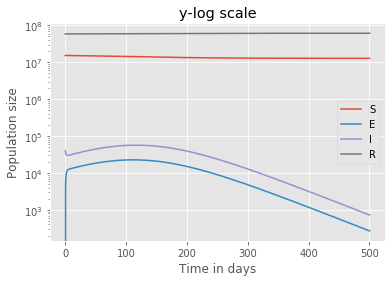

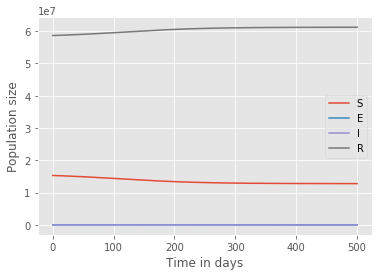

In [7]:
# Code for finding minimum vaccination rate
# lst = []
# for i in range(int(10e6), int(59e6), int(1e3)):
#     seir_tup = seir(1000, 0.5, vacc_count=i)
#     # print(seir_tup[2].max() / population_size)
#     if seir_tup[2].max() < (epidemic_percentage * population_size):
#         lst.append((i, seir_tup[2].max()))
#         plot_seir(seir_tup, log=True)
#         plot_seir(seir_tup)
#         break
# 
# lst
seir_tup = seir(1000, 0.5, vacc_count=5865e4, i0=4e4)
plot_seir(seir_tup, log=True)
plot_seir(seir_tup)
